In [35]:
import tarfile
import gzip
import shutil
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
def unzip(zipname, outname):
    """
    Unzip a file
    """
    if zipname.endswith('.gz'):
        with gzip.open(zipname, 'rb') as f_in:
            with open(outname, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    elif zipname.endswith('.tar.gz'):
        with tarfile.open(zipname, 'r:gz') as tar:
            tar.extractall(outname)

# unzip("../Data/twitter.tar.gz", "../Data/twitter.bin")
# unzip("../Data/twitter_combined.txt.gz", "../Data/twitter_combined.txt")

In [9]:
def getNodesEdges(filename):
    """
    Get nodes and edges from a file
    """
    nodes = set()
    edges = []
    with open(filename, 'r') as f:
        for line in f:
            src, dst = line.strip().split()
            nodes.add(src)
            nodes.add(dst)
            edges.append((src, dst))
    print("Number of Nodes:", len(nodes))
    print("Number of Edges:", len(edges))
    return nodes, edges

nodes, edges = getNodesEdges("../Data/wiki-Vote.txt")

Number of Nodes: 7115
Number of Edges: 103689


In [57]:
class Graph:
    def __init__(self, nodes, edges):
        self.g = {}
        for node in nodes:
            self.g[node] = []
        for edge in edges:
            self.addEdge(edge[0], edge[1])
        self.nodes = nodes
        self.edges = edges

    
    def addEdge(self, node1, node2):
        if node1 not in self.g:
            self.g[node1] = [node2]
        else:
            self.g[node1].append(node2)

    def avgInDegree(self):
        """Average in-degree in directed graph"""
        inDegrees = {}
        for node in self.g:
            for neighbor in self.g[node]:
                if neighbor not in inDegrees:
                    inDegrees[neighbor] = 1
                else:
                    inDegrees[neighbor] += 1
        return sum(inDegrees.values()) / len(self.g)

    def avgOutDegree(self):
        """Average out-degree in directed graph"""
        return sum(len(v) for v in self.g.values()) / len(self.g)
    
    def maxInDegree(self):
        inDegrees = {}
        for node in self.g:
            for neighbor in self.g[node]:
                if neighbor not in inDegrees:
                    inDegrees[neighbor] = 1
                else:
                    inDegrees[neighbor] += 1
        return max(inDegrees.values())
    
    def maxOutDegree(self):
        return max(len(v) for v in self.g.values())
    
    def density(self):
        """Density of the graph"""
        return len(self.edges) / (len(self.nodes) * (len(self.nodes) - 1))
    
    def plotOutDegreeDistribution(self):
        """Plot out-degree distribution of the graph"""
        degrees = []
        for node in self.g:
            degrees.append(len(self.g[node]))
        c = Counter(degrees)
        plt.title("Out-degree Distribution")
        plt.bar(c.keys(), c.values())
        plt.show()
    
    def plotInDegreeDistribution(self):
        """Plot in-degree distribution of the graph"""
        inDegrees = {}
        for node in self.g:
            for neighbor in self.g[node]:
                if neighbor not in inDegrees:
                    inDegrees[neighbor] = 1
                else:
                    inDegrees[neighbor] += 1
        inDegrees = list(inDegrees.values())
        c = Counter(inDegrees)
        plt.title("In-degree Distribution")
        plt.bar(c.keys(), c.values())
        plt.show()

    
    def localClusteringCoeff(self, node):
        """Local clustering coefficient of the directed graph"""
        neighbors = self.g[node]
        if len(neighbors) == 0 or len(neighbors) == 1:
            return 0
        else:
            return len(neighbors) / (len(neighbors) - 1) * sum(1 for n in neighbors if node in self.g[n]) / len(neighbors)
    
    def clusteringCoeffDist(self):
        """Clustering coefficient distribution of the graph"""
        coeffs = []
        for node in self.g:
            coeffs.append(self.localClusteringCoeff(node))
        c = Counter(coeffs)
        plt.title("Clustering Coefficient Distribution")
        plt.bar(c.keys(), c.values())
        plt.show()

In [58]:
graph = Graph(nodes, edges)
print("Average In Degree:", graph.avgInDegree())
print("Average Out Degree:", graph.avgOutDegree())
print("Max In Degree:", graph.maxInDegree())
print("Max Out Degree:", graph.maxOutDegree())
print("Density:", graph.density())

Average In Degree: 14.573295853829936
Average Out Degree: 14.573295853829936
Max In Degree: 457
Max Out Degree: 893
Density: 0.0020485375110809584


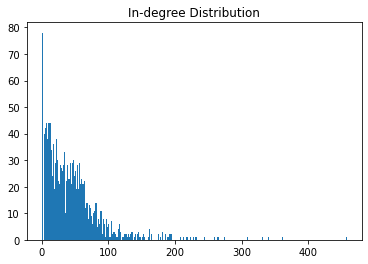

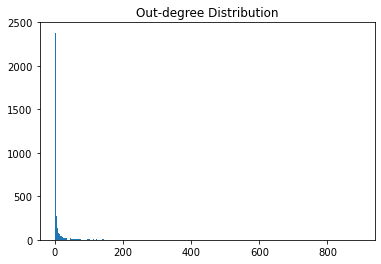

(None, None)

In [59]:
graph.plotInDegreeDistribution(), graph.plotOutDegreeDistribution()

In [ ]:
graph.clusteringCoeffDist()